In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# plt.style.use('ggplot')
import nltk

In [3]:
df = pd.read_csv('/content/Reviews.csv')

In [4]:
df=df.head(90000)

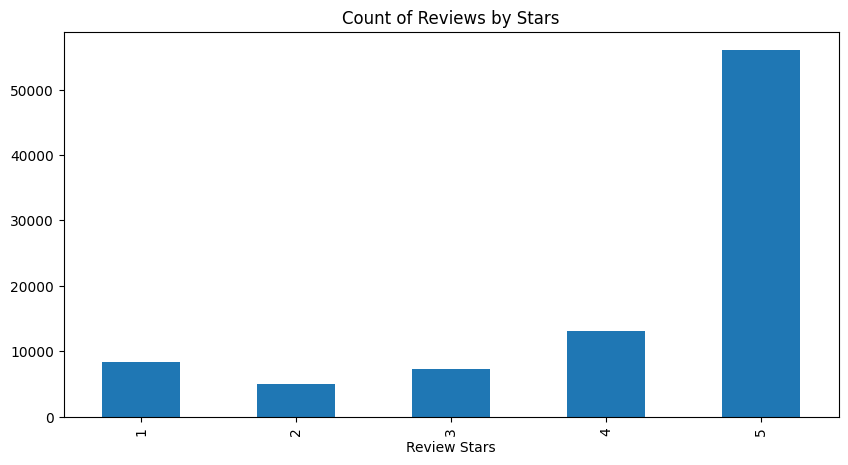

In [5]:
ax = df['Score'].value_counts().sort_index().plot(kind="bar",title="Count of Reviews by Stars",figsize=(10,5))
ax.set_xlabel('Review Stars')
plt.show()

In [6]:
example = df['Text'][4]
example

'Great taffy at a great price.  There was a wide assortment of yummy taffy.  Delivery was very quick.  If your a taffy lover, this is a deal.'

In [7]:
nltk.download('punkt')
nltk.word_tokenize(example)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


['Great',
 'taffy',
 'at',
 'a',
 'great',
 'price',
 '.',
 'There',
 'was',
 'a',
 'wide',
 'assortment',
 'of',
 'yummy',
 'taffy',
 '.',
 'Delivery',
 'was',
 'very',
 'quick',
 '.',
 'If',
 'your',
 'a',
 'taffy',
 'lover',
 ',',
 'this',
 'is',
 'a',
 'deal',
 '.']

In [8]:
nltk.download('averaged_perceptron_tagger')
tagged = nltk.pos_tag(nltk.word_tokenize(df['Text'][4]))

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [9]:
nltk.download('maxent_ne_chunker')
nltk.download('words')
entities= nltk.chunk.ne_chunk(tagged)
entities.pprint()

[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


(S
  (GPE Great/NNP)
  taffy/NN
  at/IN
  a/DT
  great/JJ
  price/NN
  ./.
  There/EX
  was/VBD
  a/DT
  wide/JJ
  assortment/NN
  of/IN
  yummy/NN
  taffy/NN
  ./.
  (PERSON Delivery/NNP)
  was/VBD
  very/RB
  quick/JJ
  ./.
  If/IN
  your/PRP$
  a/DT
  taffy/NN
  lover/NN
  ,/,
  this/DT
  is/VBZ
  a/DT
  deal/NN
  ./.)


## VADER USE
- This doesn't account for relationship between words
- Uses the Bag of Words approach
- Stop words are removed (and, the, of)

In [10]:
nltk.download('vader_lexicon')
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [11]:
sia.polarity_scores('Most people die at 25 and are buried at 75')

{'neg': 0.317, 'neu': 0.683, 'pos': 0.0, 'compound': -0.6344}

In [12]:
sia.polarity_scores(example)

{'neg': 0.0, 'neu': 0.552, 'pos': 0.448, 'compound': 0.9468}

In [13]:
res={}
for i,row in tqdm(df.iterrows(),total=len(df)):
  text=row['Text']
  myid = row['Id']
  res[myid] = sia.polarity_scores(text)


  0%|          | 0/90000 [00:00<?, ?it/s]

In [14]:
vaders = pd.DataFrame(res).T
vaders

,neg,neu,pos,compound
1,0.000,0.695,0.305,0.9441
2,0.138,0.862,0.000,-0.5664
3,0.091,0.754,0.155,0.8265
4,0.000,1.000,0.000,0.0000
5,0.000,0.552,0.448,0.9468
...,...,...,...,...
89996,0.034,0.819,0.147,0.8616
89997,0.006,0.847,0.147,0.9938
89998,0.000,0.794,0.206,0.6900
89999,0.028,0.842,0.129,0.7596


In [15]:
vaders = vaders.reset_index().rename(columns={'index':'Id'})
vaders

,Id,neg,neu,pos,compound
0,1,0.000,0.695,0.305,0.9441
1,2,0.138,0.862,0.000,-0.5664
2,3,0.091,0.754,0.155,0.8265
3,4,0.000,1.000,0.000,0.0000
4,5,0.000,0.552,0.448,0.9468
...,...,...,...,...,...
89995,89996,0.034,0.819,0.147,0.8616
89996,89997,0.006,0.847,0.147,0.9938
89997,89998,0.000,0.794,0.206,0.6900
89998,89999,0.028,0.842,0.129,0.7596


In [16]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [17]:
vaders = vaders.merge(df,how='left')

In [18]:
vaders

,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89995,89996,0.034,0.819,0.147,0.8616,B002LANN56,A2065HBMYDXJ1S,"Jenn B ""Happy Mom""",0,0,4,1348617600,Seems better for your dog,I like this dog food because they claim to hav...
89996,89997,0.006,0.847,0.147,0.9938,B002LANN56,A17UNMURMLX0ZE,C. Weaver,0,0,5,1348531200,The dogs rate it *****,"First the dogs love it, this food must smell g..."
89997,89998,0.000,0.794,0.206,0.6900,B001IZI026,A1THUW6DDEEFXB,Christa,0,0,5,1313107200,Wedding,I am going to be using this product for the ca...
89998,89999,0.028,0.842,0.129,0.7596,B004RBEQZI,AXIBU8SOYD3RK,worldDominator2041,0,0,5,1335139200,Delicious,"I forgot chocolate had a low melting point, an..."


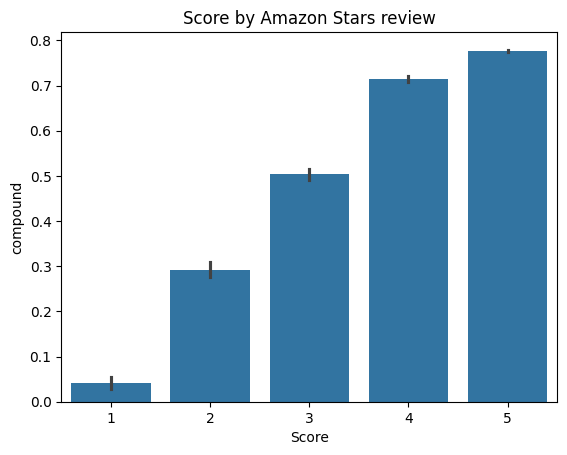

In [19]:
ax=sns.barplot(data=vaders,x='Score',y='compound')
ax.set_title('Score by Amazon Stars review')
plt.show()

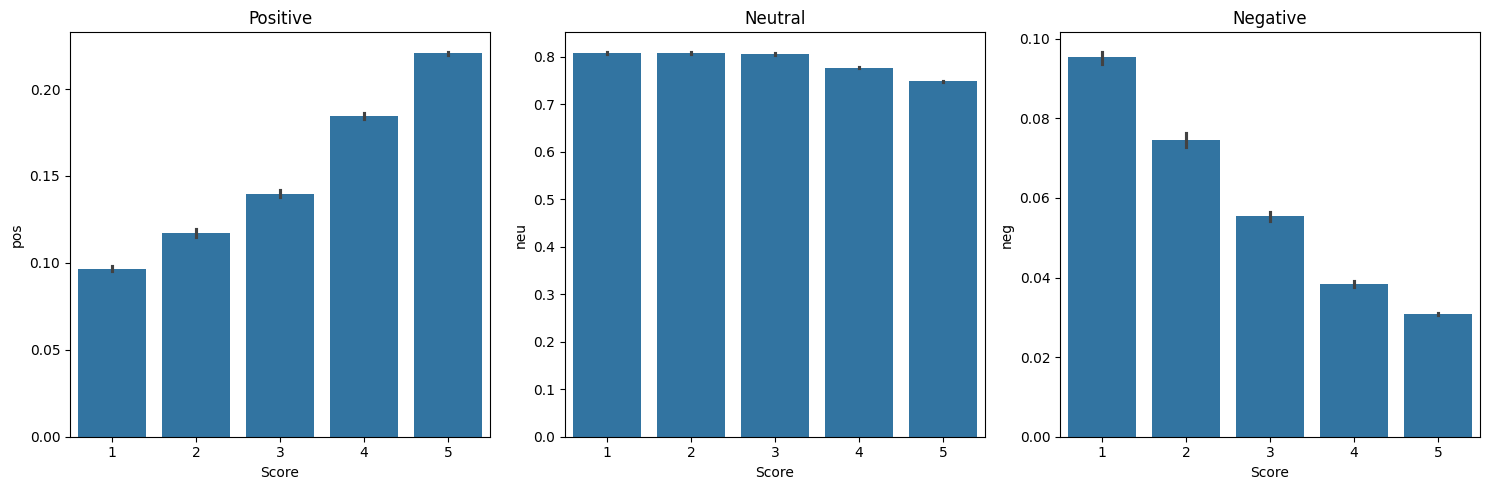

In [20]:
fig,axs = plt.subplots(1,3,figsize=(15,5))
sns.barplot(data=vaders,x='Score',y='pos',ax=axs[0])
sns.barplot(data=vaders,x='Score',y='neu',ax=axs[1])
sns.barplot(data=vaders,x='Score',y='neg',ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

In [21]:
!pip install transformers

In [22]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from scipy.special import softmax
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/747 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/150 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


pytorch_model.bin:   0%|          | 0.00/499M [00:00<?, ?B/s]

In [23]:
print(example)
sia.polarity_scores(example)

Great taffy at a great price.  There was a wide assortment of yummy taffy.  Delivery was very quick.  If your a taffy lover, this is a deal.


{'neg': 0.0, 'neu': 0.552, 'pos': 0.448, 'compound': 0.9468}

In [24]:
encoded_text = tokenizer(example,return_tensors='pt')
output=model(**encoded_text)
values = output[0][0].detach().numpy()
values = softmax(values)

In [25]:
scores_dict={
    'roberta_neg':values[0],
    'roberta_neu':values[1],
    'roberta_pos':values[2]
}
print(scores_dict)

{'roberta_neg': 0.0016347291, 'roberta_neu': 0.0103024645, 'roberta_pos': 0.98806286}


In [26]:
def polarity_scores_roberta(example):
    encoded_text = tokenizer(example, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'roberta_neg' : scores[0],
        'roberta_neu' : scores[1],
        'roberta_pos' : scores[2]
    }
    return scores_dict

In [27]:
polarity_scores_roberta(example)

{'roberta_neg': 0.0016347291,
 'roberta_neu': 0.0103024645,
 'roberta_pos': 0.98806286}

In [28]:
df=df[:1500]

In [33]:
res={}
for i,row in tqdm(df.iterrows(),total=len(df)):
  try:
    text=row['Text']
    myId=row['Id']
    vader_score = sia.polarity_scores(text)
    roberta_score = polarity_scores_roberta(text)
    vader_score1={}
    for key,val in vader_score.items():
      vader_score1[f"vader_{key}"]=val
    res[myId]={**vader_score1,**roberta_score}
  except RuntimeError:
    print(f'Broke for id {myId}')

  0%|          | 0/1500 [00:00<?, ?it/s]

Broke for id 83
Broke for id 187
Broke for id 529
Broke for id 540
Broke for id 746
Broke for id 863
Broke for id 1053
Broke for id 1070
Broke for id 1156
Broke for id 1321
Broke for id 1375
Broke for id 1498


In [34]:
output = pd.DataFrame(res).T

output = output.reset_index().rename(columns={'index':'Id'})
output = output.merge(df,how='left')
output

,Id,vader_neg,vader_neu,vader_pos,vader_compound,roberta_neg,roberta_neu,roberta_pos,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,0.009624,0.049980,0.940395,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,0.508986,0.452414,0.038600,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,0.003229,0.098067,0.898704,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,0.002295,0.090219,0.907486,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,0.001635,0.010302,0.988063,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1483,1495,0.029,0.764,0.207,0.8653,0.012041,0.062447,0.925513,B002JLT6QC,ART6IV50G99VR,Pat A,4,5,3,1291420800,Just OK,I am a big fan of most of the freeze dried fru...
1484,1496,0.000,0.731,0.269,0.9404,0.014734,0.037057,0.948209,B002JLT6QC,A1EVDWA956XRJW,"Krystal-Karma ""Blessings, Joy and Love""",1,1,4,1319760000,Prefer the whole slices,I absolutely LOVE the just tomatoes tomatoe sl...
1485,1497,0.000,0.903,0.097,0.3919,0.002046,0.148709,0.849245,B002JLT6QC,A1E7G56OX03JKO,Ranch Girl,1,1,5,1309996800,Nice to have in the pantry,"I toss some of these in soups, or hydrate in a..."
1486,1499,0.082,0.824,0.093,0.8413,0.380819,0.383799,0.235382,B002KGN4LE,A1AQPNFHTL0ZQH,L. Juarez,9,9,5,1272931200,Colic/acid reflux babies...try this!,HANDS DOWN the best formula on the market. Sa...


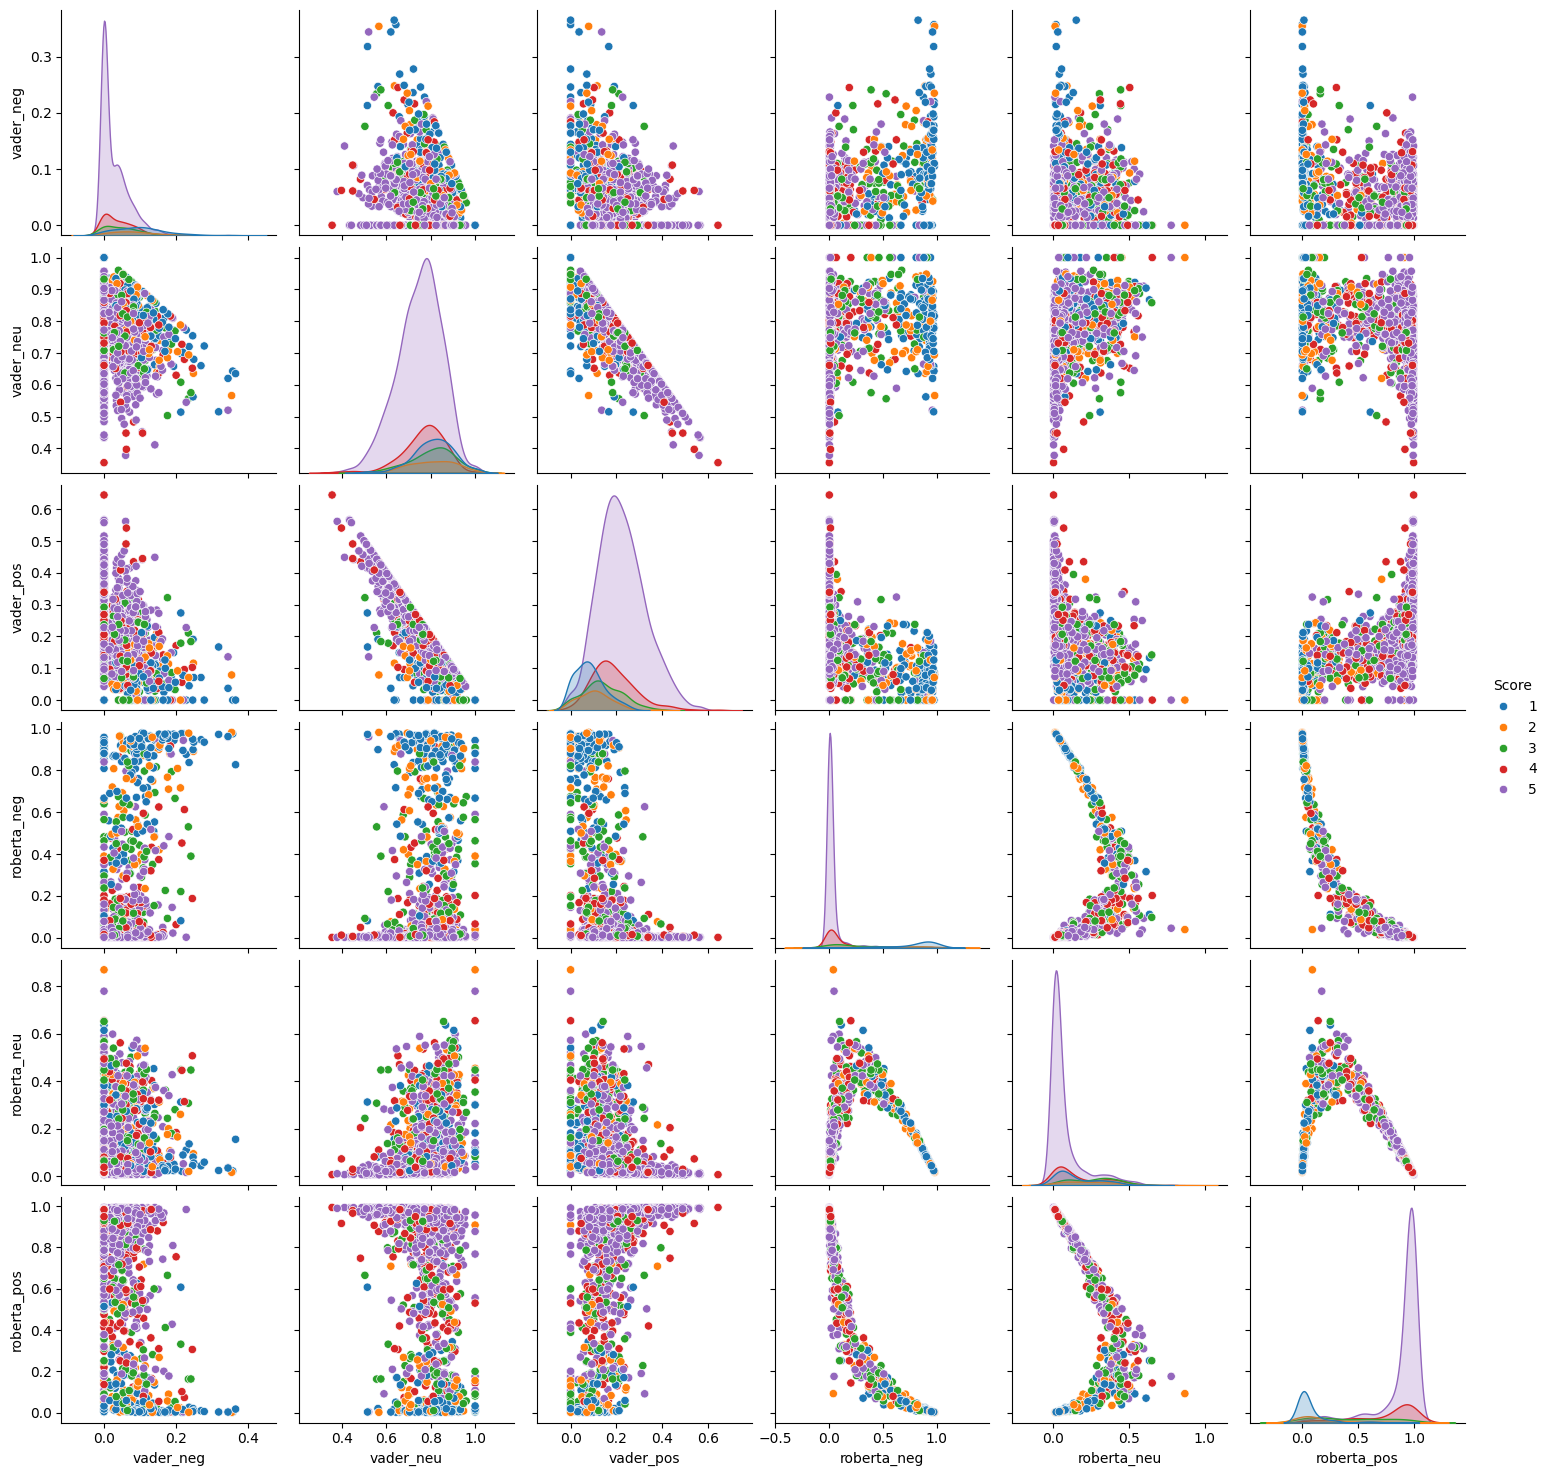

In [35]:
sns.pairplot(data=output,vars=['vader_neg','vader_neu','vader_pos','roberta_neg','roberta_neu','roberta_pos'],hue='Score',palette='tab10')
plt.show()

In [37]:
print(output.query('Score==1').sort_values('roberta_pos',ascending=False)["Text"].values[0])
print(output.query('Score==1').sort_values('vader_pos',ascending=False)["Text"].values[0])
print(output.query('Score==5').sort_values('roberta_neg',ascending=False)["Text"].values[0])

I just wanted to post here that I found small bits of plastic in this food as I was feeding my 9 month old.  Plastic!!! in food!!!! baby food!!!  So please be careful if you buy this or are considering it.<br /><br />My daughter LOVES this food-- it's actually her favorite.  This is the first time we have noticed plastic in it in over 2 months.
So we cancelled the order.  It was cancelled without any problem.  That is a positive note...
this was sooooo deliscious but too bad i ate em too fast and gained 2 pds! my fault


# Using Pipelines

In [38]:
from transformers import pipeline
sentiment_pipeline = pipeline('sentiment-analysis')
sentiment_pipeline('Pikachu, I choose you!')

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


[{'label': 'POSITIVE', 'score': 0.9996770620346069}]